<a href="https://colab.research.google.com/github/sunny420x/Prediction-Model-of-SpeedDating-Dataset./blob/main/SpeedDating_LinearRegression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Cleaning ##

In [ ]:
import pandas as pd
import numpy as np

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

names = "has_null wave gender age age_o d_age d_d_age race race_o samerace importance_same_race importance_same_religion d_importance_same_race d_importance_same_religion field pref_o_attractive pref_o_sincere pref_o_intelligence pref_o_funny pref_o_ambitious pref_o_shared_interests d_pref_o_attractive d_pref_o_sincere d_pref_o_intelligence d_pref_o_funny d_pref_o_ambitious d_pref_o_shared_interests attractive_o sinsere_o intelligence_o funny_o ambitous_o shared_interests_o d_attractive_o d_sinsere_o d_intelligence_o d_funny_o d_ambitous_o d_shared_interests_o attractive_important sincere_important intellicence_important funny_important ambtition_important shared_interests_important d_attractive_important d_sincere_important d_intellicence_important d_funny_important d_ambtition_important d_shared_interests_important attractive sincere intelligence funny ambition d_attractive d_sincere d_intelligence d_funny d_ambition attractive_partner sincere_partner intelligence_partner funny_partner ambition_partner shared_interests_partner d_attractive_partner d_sincere_partner d_intelligence_partner d_funny_partner d_ambition_partner d_shared_interests_partner sports tvsports exercise dining museums art hiking gaming clubbing reading tv theater movies concerts music shopping yoga d_sports d_tvsports d_exercise d_dining d_museums d_art d_hiking d_gaming d_clubbing d_reading d_tv d_theater d_movies d_concerts d_music d_shopping d_yoga interests_correlate d_interests_correlate expected_happy_with_sd_people expected_num_interested_in_me expected_num_matches d_expected_happy_with_sd_people d_expected_num_interested_in_me d_expected_num_matches like guess_prob_liked d_like d_guess_prob_liked met decision decision_o match".split(" ")

def findMedian(s):
    if isinstance(s, str) and '-' in s and '[' in s and ']' in s:
        s = s.strip('[]')
        try:
            low, high = s.split('-')
            return (int(low) + int(high)) / 2
        except ValueError:
            return None
    else:
        return s

def replace_negative(val):
    try:
        val = float(val)
        return 0 if val < 0 else val
    except ValueError:
        # Handle non-numeric values by returning them unchanged (or set to 0 if you want)
        return val

def clean_binary_string(value):
    if isinstance(value, str) and value.startswith("b'"):
        # Remove the prefix b' and the ending single quote
        return value.replace("b'", "").replace("'", "")
    return value

df = pd.read_csv("./Data/speeddating.csv", names=names)

df = df.drop('wave', axis=1)
df = df.drop('race', axis=1)
df = df.drop('race_o', axis=1)
df = df.drop('field', axis=1)
df = df.drop('has_null', axis=1)
df = df.drop('decision', axis=1)
df = df.drop('decision_o', axis=1)

#df['gender'] = df['gender'].apply(gender_replace)
df = df.applymap(clean_binary_string)

df = df.loc[1::,~df.columns.str.startswith('d_')] #Remove first heading row and cleaning columns starting with d_.
df = df.fillna(0)

#Cleaning Negative 'interests_correlate'
df['interests_correlate'] = df['interests_correlate'].apply(replace_negative)

df.head()

<ipython-input-141-16ff69e75484>:35: DtypeWarning: Columns (1,3,4,5,10,11,15,16,17,18,19,20,27,28,29,30,31,32,39,40,41,42,43,44,51,52,53,54,55,61,62,63,64,65,66,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,107,109,110,111,115,116,119) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Data/speeddating.csv", names=names)
<ipython-input-141-16ff69e75484>:46: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(clean_binary_string)


,gender,age,age_o,samerace,importance_same_race,importance_same_religion,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,...,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_interested_in_me,expected_num_matches,like,guess_prob_liked,met,match
1,female,21.0,27.0,0,2.0,4.0,35.0,20.0,20.0,20.0,...,8.0,1.0,0.14,3.0,2.0,4.0,7.0,6.0,0.0,0
2,female,21.0,22.0,0,2.0,4.0,60.0,0.0,0.0,40.0,...,8.0,1.0,0.54,3.0,2.0,4.0,7.0,5.0,1.0,0
3,female,21.0,22.0,1,2.0,4.0,19.0,18.0,19.0,18.0,...,8.0,1.0,0.16,3.0,2.0,4.0,7.0,0,1.0,1
4,female,21.0,23.0,0,2.0,4.0,30.0,5.0,15.0,40.0,...,8.0,1.0,0.61,3.0,2.0,4.0,7.0,6.0,0.0,1
5,female,21.0,24.0,0,2.0,4.0,30.0,10.0,20.0,10.0,...,8.0,1.0,0.21,3.0,2.0,4.0,6.0,6.0,0.0,1


## Split X,Y and find a suitable attribute for a training ##

In [160]:
# Feature extraction
df_arr = df.values

X = df_arr[:,1:len(df_arr)-1]
Y = df_arr[:,len(df_arr[1])-1]

test = SelectKBest(score_func=chi2, k=6)
fit = test.fit(X, Y)

# Summarize scores
# print(names[1:122])
np.set_printoptions(precision=None)
# print(fit.scores_)
print(fit.get_feature_names_out())

X_selection = fit.transform(X)

feature_names = fit.get_feature_names_out()
column_indices = [int(name.split("x")[1]) for name in feature_names]
print("---------------------")
for index in column_indices:
    if 0 <= index < len(df.columns):
        print(df.columns[index])
    else:
        print(f"Index {index} is out of range.")

['x14' 'x16' 'x33' 'x55' 'x56' 'x58']
---------------------
intelligence_o
ambitous_o
ambition_partner
expected_num_matches
like
met


## Training the model. ##

X train size: 6702
X test size: 1676
Y train size: 6702
Y test size: 1676
Train MSE: 1.74012528446905e-31
Test MSE: 1.789662539331731e-31
Train R²: 1.0
Test R²: 1.0


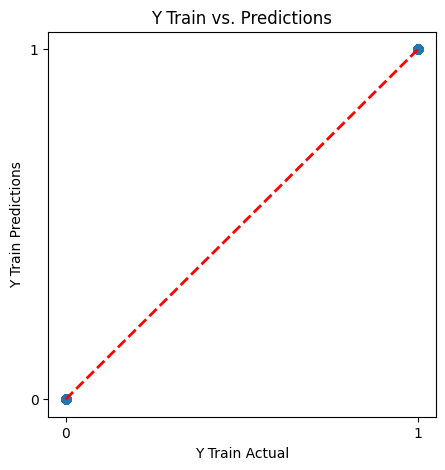

In [159]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

X_train, X_test, Y_train, Y_test = train_test_split(X_selection, Y, test_size=0.2, random_state=42)

print("X train size: "+str(len(X_train)))
print("X test size: "+str(len(X_test)))

print("Y train size: "+str(len(Y_train)))
print("Y test size: "+str(len(Y_test)))

lr = LinearRegression()
lr.fit(X_train, Y_train)

Y_linear_train_prediction = lr.predict(X_train)
Y_linear_test_prediction = lr.predict(X_test)

#Y_linear_train_prediction
#Y_linear_test_prediction

lr_train_mse = mean_squared_error(Y_train, Y_linear_train_prediction)
lr_test_mse = mean_squared_error(Y_test, Y_linear_test_prediction)

lr_train_r2 = r2_score(Y_train, Y_linear_train_prediction)
lr_test_r2 = r2_score(Y_test, Y_linear_test_prediction)

print("Train MSE:",lr_train_mse)
print("Test MSE:",lr_test_mse)
print("Train R²:", lr_train_r2)
print("Test R²:", lr_test_r2)

plt.figure(figsize=(5,5))
plt.scatter(Y_train, Y_linear_train_prediction, alpha=0.3)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'r--', lw=2)
plt.ylabel("Y Train Predictions")
plt.xlabel("Y Train Actual")
plt.title("Y Train vs. Predictions")
plt.show()

## Random Data Prediction ##

In [180]:
from sklearn.preprocessing import StandardScaler

# Example feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

data = []
for index in column_indices:
    if 0 <= index < len(df.columns):
        value = float(input(f"Enter {df.columns[index]}: "))
        data.append(value)

data = np.array(data).reshape(1, -1)
data_scaled = scaler.transform(data)

# Make a prediction using the trained model
Y_prediction = lr.predict(data_scaled)

# Print the predicted result
print("Predicted Y:", Y_prediction)
Y_prediction = np.clip(Y_prediction, 0, 1)
print("Clipped Predicted Y:", Y_prediction)

Enter intelligence_o: 40
Enter ambitous_o: 30
Enter ambition_partner: 20
Enter expected_num_matches: 8
Enter like: 7
Enter met: 0
Predicted Y: [-0.441]
Clipped Predicted Y: [0.]
